In [1]:
import pandas as pd 
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def polynomialDataFrame(feature, degree):
    '''
    takes a pd.series feature 
    put the first colum with name power_1 and the original feature 
    the second with in_feature ** 2 under name power_2 
    '''
    output = pd.DataFrame()
    for cur_degree in range(degree):
        output["power" + str(cur_degree + 1)] = feature ** (cur_degree + 1)
    return output

In [7]:
train_data =  pd.read_csv('./data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
valid_data = pd.read_csv('./data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('./data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [10]:
max_order = 15
train_xs = polynomialDataFrame(train_data['sqft_living'],max_order)
train_y = train_data['price']
valid_xs = polynomialDataFrame(valid_data['sqft_living'],max_order)
valid_y = valid_data['price']
test_xs = polynomialDataFrame(test_data['sqft_living'], max_order)
test_y = test_data['price']

In [20]:
all_model = {}
all_RSS = {}
for cur_order in range(1,max_order + 1):
    cur_xs_train = np.vstack([train_xs['power' + str(idx)] for idx in range(1, cur_order + 1)])
    cur_xs_train = cur_xs_train.transpose()
    cur_model = linear_model.LinearRegression()
    cur_model.fit(cur_xs_train, train_y)
    # predict the y value in validation set 
    cur_xs_valid = np.vstack([valid_xs['power' + str(idx)] for idx in range(1, cur_order + 1)])
    cur_xs_valid = cur_xs_valid.transpose()
    fit_y = cur_model.predict(cur_xs_valid)
    # calculate RSS and save model 
    cur_RSS = sum([(fit_y[idx] - valid_y[idx])**2 for idx in range(len(fit_y))])
    all_RSS[cur_order] = cur_RSS
    all_model[cur_order] = cur_model
    # print out result 
    print(cur_order, ': ', cur_RSS)

1 :  6.290978863e+14
2 :  6.23955062707e+14
3 :  6.25820280252e+14
4 :  6.29987341469e+14
5 :  6.28238459168e+14
6 :  5.66268554129e+14
7 :  1.07384547537e+15
8 :  7.08780463037e+15
9 :  4.53039037645e+16
10 :  2.4736327721e+17
11 :  1.19378394915e+18
12 :  5.22639692449e+18
13 :  7.61623002125e+17
14 :  2.29756092505e+18
15 :  6.95503809734e+18


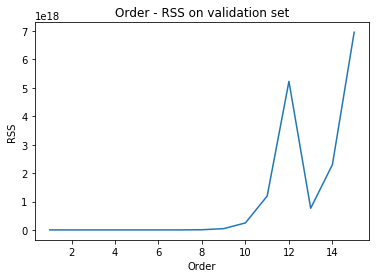

In [36]:
plt.figure()
plt.title("Order - RSS on validation set")
plt.plot(list(all_RSS.keys()),
         list(all_RSS.values()))
plt.xlabel('Order')
plt.ylabel('RSS')
plt.show()

In [39]:
# on Test set 
best_order = min(all_RSS, key = all_RSS.get)
print("Best Order: ", best_order)
best_model = all_model[best_order]
best_order_xs = np.vstack([test_xs['power' + str(idx)] for idx in range(1,best_order+1)])
best_order_xs = best_order_xs.transpose()
fit_test = best_model.predict(best_order_xs)
best_RSS_test = sum([(fit_test[idx] - test_y[idx]) ** 2 for idx in range(len(fit_test))])
print('Test RSS: ', best_RSS_test)

Best Order:  6
Test RSS:  1.35225113037e+14
